## Observations and Insights 
Observations:
1) Based on the boxplot and individual line plot Capomulin appeared to be one of the more effective drugs.
Within the bloxplot only Ramicane had slightly lower Tumor Volume levels and both experienced much more consistent results with 
similarly smaller IQR's compared to the other treatments. Randomly selecting mice, nearly every mouse that took Capomulin survived
to have data collected at the 45 Timepoint and saw their Tumor Volume's (mm3) decrease dramatically.

2) The data seemed to imply that the tests were conducted well and had predictable results. There was only 1 potential outlier detected
within the boxplots and looked at the standard deviations across the drugs they seemed reasonably small (no heavy skewing).

3) Finally looking at the scatterplots Mice Weight and thus size seemed to be a good predictor of Tumor Volume. A r-value of 0.84 reflects
a decently strong, positive correlation between the variables. Furthermore a r^2 of 0.71 tells us that 71% of a mouse's overall tumor volume is explained by its own mass. Could tell us a lot about the management of cancer and the effect a subjects weight (or possibly being overweight) having an impact on treatments.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_df = pd.merge(mouse_metadata,study_results,on = 'Mouse ID', how = 'inner')
# Display the data table for preview
mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_df['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_df[mice_df.duplicated(subset = ['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 
# I think that's what I displayed above.

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanmice_df = mice_df.copy()
cleanmice_df = cleanmice_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])

In [6]:
# Checking the number of mice in the clean DataFrame.
cleanmice_df['Mouse ID'].nunique()

249

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_groups = cleanmice_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = drug_groups['Tumor Volume (mm3)'].mean()
drug_median = drug_groups['Tumor Volume (mm3)'].median()
drug_var = drug_groups['Tumor Volume (mm3)'].var()
drug_std = drug_groups['Tumor Volume (mm3)'].std()
drug_sem = drug_groups['Tumor Volume (mm3)'].sem()

# Making the dictionary that will create the dataframe.
drug_dict = {'Mean': drug_mean, 'Median': drug_median, 'Variance': drug_var, 'Standard Deviation': drug_std, 'Standard Error Mean': drug_sem}
drug_df = pd.DataFrame.from_dict(drug_dict)

drug_df.head()

,Mean,Median,Variance,Standard Deviation,Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_table = cleanmice_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median', 'var', 'std', 'sem']})

# Fixing the column names.
agg_table = agg_table.rename(columns = {'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation','sem': 'Standard Error Mean'}).head()

agg_table

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   

                                  
             Standard Error Mean  
Drug Regimen                      
Capomulin               0.329346  
Ceftamin                0.469821  
Infubinol               0.492236  
Ketapril                0.603860  
Naftisol                0.596466

## Bar and Pie Charts

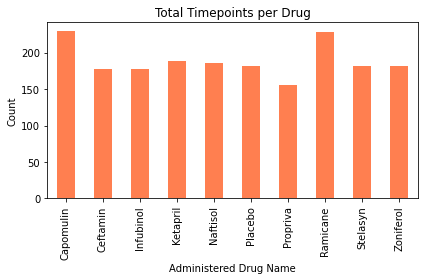

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Counting the timepoints based on drug name.
drug_count = drug_groups['Timepoint'].count()

# Making the bargraph from the data.
drug_count.plot(kind = 'bar', facecolor = 'coral')

# Adding proper labeling to the graph for clarity.
plt.title("Total Timepoints per Drug")
plt.ylabel('Count')
plt.xlabel('Administered Drug Name')

plt.tight_layout()
plt.show()

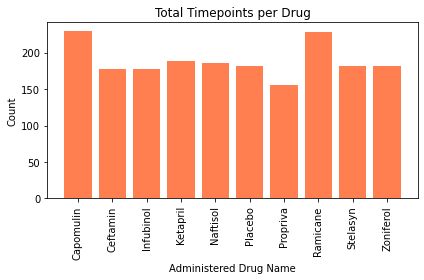

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Storing the drug names for labeling
drug_names = drug_df.index

# Using the names of the drugs to determine how many bars the graph will need.
xaxis = np.arange(0, len(drug_names), 1)

# Creating the initial bar graph.
plt.bar(xaxis, drug_count, color = 'coral')

# Adding labels to the tickmarks.
plt.xticks(xaxis, drug_names, rotation = 90)

# Adding proper labeling to the graph for clarity.
plt.title("Total Timepoints per Drug")
plt.ylabel('Count')
plt.xlabel('Administered Drug Name')

plt.tight_layout()
plt.show()


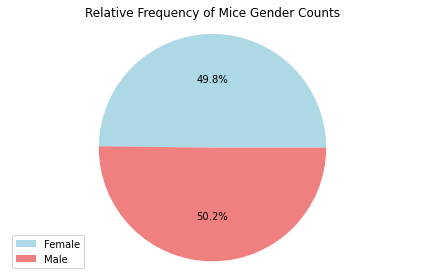

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# First drop all the duplicate Mouse ID so each mouse is only listed once.
mice_list = cleanmice_df.drop_duplicates(subset = 'Mouse ID')

# Group the mice by gender, then count them.
gender_count = mice_list.groupby('Sex')['Mouse ID'].count()

# Creating the pie chart, switching from count to percentage
# Removed the labels to stop it looking crowded.
mice_pie = gender_count.plot(kind = "pie", labels = None, colors = ['lightblue','lightcoral'],autopct = '%1.1f%%', title=("Relative Frequency of Mice Gender Counts"))

# Adding a legend instead of the labels.
mice_pie.legend(loc=3, labels=gender_count.index)

# Removed y-label as it cluttered the image and the information is in the title.
mice_pie.set_ylabel(None)

# Made sure it was squared up.
plt.axis("equal")

plt.tight_layout()
plt.show()

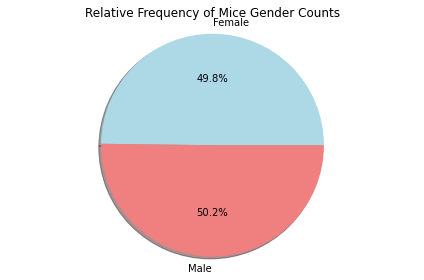

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Here are the labels traditionally used.
labels = gender_count.index

# The values of each section of the pie chart is the previously found gender_counts

# The colors of each section of the pie chart
colors = ["lightblue", "lightcoral"]

# Creating the pie chart based upon the values above
plt.pie(gender_count, colors = colors, labels = labels, autopct="%1.1f%%", shadow = True)
plt.title("Relative Frequency of Mice Gender Counts")

plt.axis("equal")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#   greatest_mice_df = cleanmice_df.sort_values(by = ['Timepoint'], ascending = False)
# Then drop all the duplicate ID's leaving the first occurence, which would in turn be last timepoint.
#   greatest_mice_list = greatest_mice_df.drop_duplicates(subset = 'Mouse ID')
# This seemed quick, but was not how it was asked to be done.


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint.
tumors_atlast = cleanmice_df.groupby('Mouse ID').agg({'Timepoint':'max'})
mice_greatest_timepoint = pd.merge(cleanmice_df, tumors_atlast, on =['Mouse ID','Timepoint'], how='inner')

#mice_greatest_timepoint.loc[(mice_greatest_timepoint['Drug Regimen'] == 'Capomulin')|(mice_last_time['Drug Regimen'] == 'Ramicane')]
    # The above method seemed to clunky.

#Filtering the mice to only include those with the indicated drug regimens
listofdrugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
mice_greatest_timepoint[mice_greatest_timepoint['Drug Regimen'].isin(listofdrugs)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
235,x822,Ceftamin,Male,3,29,45,61.386660,3
237,y163,Infubinol,Female,17,27,45,67.685569,3
241,y769,Ceftamin,Female,6,27,45,68.594745,4
242,y865,Ceftamin,Male,23,26,45,64.729837,3


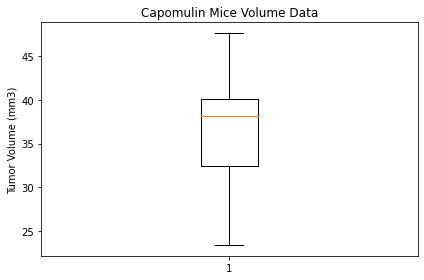

5-Number Summary for Capomulin is: Min:23.34, Q1:32.38, M:38.13, Q3:40.16, Max:47.69
	Using the IQR: 7.78, Lower Bound = 20.71, Upper Bound = 51.83


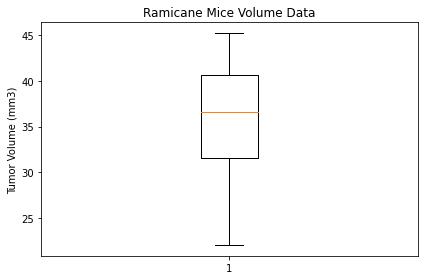

5-Number Summary for Ramicane is: Min:22.05, Q1:31.56, M:36.56, Q3:40.66, Max:45.22
	Using the IQR: 9.1, Lower Bound = 17.91, Upper Bound = 54.31


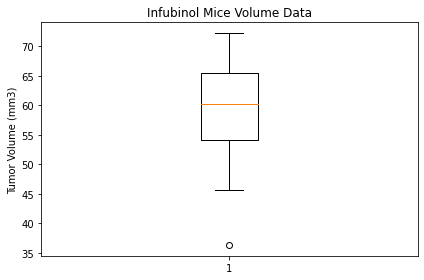

5-Number Summary for Infubinol is: Min:36.32, Q1:54.05, M:60.17, Q3:65.53, Max:72.23
	Using the IQR: 11.48, Lower Bound = 36.83, Upper Bound = 82.75
	Infubinol has atleast one lower outlier


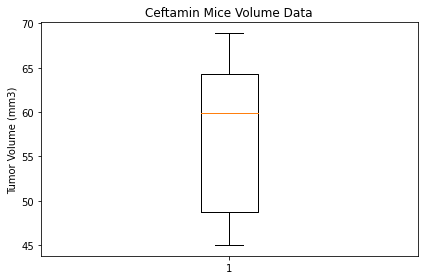

5-Number Summary for Ceftamin is: Min:45.0, Q1:48.72, M:59.85, Q3:64.3, Max:68.92
	Using the IQR: 15.58, Lower Bound = 25.35, Upper Bound = 87.67


In [14]:
# Put treatments into a list for a for loop (and later for plot labels)
listofdrugs

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

for drug in listofdrugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_filter = mice_greatest_timepoint[mice_greatest_timepoint['Drug Regimen']==drug]
    drug_volume = drug_filter['Tumor Volume (mm3)']
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = drug_volume.quantile([0.25,0.5,0.75])
    drug_min = round(drug_volume.min(),2)
    drug_max = round(drug_volume.max(),2)
    medianq = round(quartiles[0.50],2)
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
    fig1, ax1 = plt.subplots()
    ax1.set_title(f'{drug} Mice Volume Data')
    ax1.set_ylabel('Tumor Volume (mm3)')
    ax1.boxplot(drug_volume)
    plt.tight_layout()
    plt.show()

    # Printing the summary statistics for clarity.
    print(f'5-Number Summary for {drug} is: Min:{drug_min}, Q1:{lowerq}, M:{medianq}, Q3:{upperq}, Max:{drug_max}')
    print(f'\tUsing the IQR: {iqr}, Lower Bound = {lower_bound}, Upper Bound = {upper_bound}')
   
    # Determine outliers using upper and lower bounds
    if drug_min  < lower_bound:
        print(f"\t{drug} has atleast one lower outlier")
    elif upper_bound < drug_max:
        print(f"\t{drug} has atleast one upper outlier")
    
    
    
    

## Line and Scatter Plots

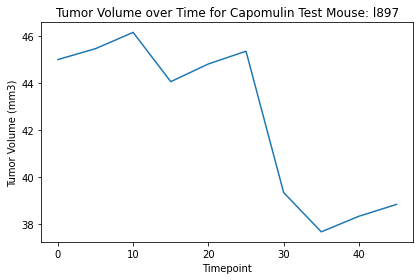

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Start by filtering only Capomulin mice.
capomulin_mice = cleanmice_df[cleanmice_df['Drug Regimen'] == 'Capomulin']

#Drop duplicates entries and save the Mouse ID's to a list.
capomulin_mice_list = capomulin_mice.drop_duplicates(subset = 'Mouse ID')
capomulin_mice_list = capomulin_mice_list['Mouse ID'].tolist()

#Randomly select the mouse to follow, filter dataframe to only show this mouse.
the_chosen_one = random.choice(capomulin_mice_list)
chosen_df = cleanmice_df[cleanmice_df['Mouse ID'] == the_chosen_one]

#Pull the Mouse's data to create graph.
xchosen = chosen_df['Timepoint']
ychosen = chosen_df['Tumor Volume (mm3)']

#Creating the graph and appropriate labels.
plt.plot(xchosen,ychosen)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume over Time for Capomulin Test Mouse: {the_chosen_one}')


plt.tight_layout()
plt.show()


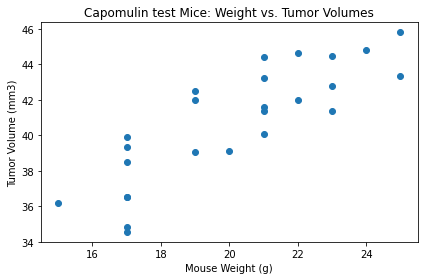

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_groups = capomulin_mice.groupby('Mouse ID')
yscatter = capomulin_groups['Tumor Volume (mm3)'].mean()
xscatter = capomulin_groups['Weight (g)'].mean()
plt.scatter(xscatter,yscatter)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin test Mice: Weight vs. Tumor Volumes')
plt.tight_layout()
plt.show()

## Correlation and Regression

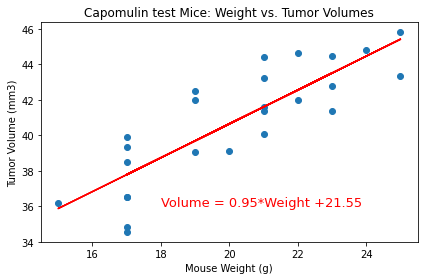

Correlation coeffecient [R-Value] is 0.84


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, _, _) = st.linregress(xscatter,yscatter)
fit = slope*xscatter+intercept

#Re-graphing with linear regression line added overlaid
plt.scatter(xscatter, yscatter)
plt.plot(xscatter, fit ,"-", color = "red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin test Mice: Weight vs. Tumor Volumes')

#Adding the equation of linear regression onto the graph.
plt.annotate(f'Volume = {round(slope,2)}*Weight +{round(intercept,2)}',[18,36], color = 'red', fontsize = 13)

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')